In [2]:
from math import floor
import heapq
import functools
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
DATASET = 'data/1.csv' 

## FUNCTIONS

In [124]:
# nalezeni vrcholu ve stromu, @deprecated
def find_vertices_in_tree(tree):
    vertices = set()
    for edge in tree:
        vertices.add(edge[1])
        vertices.add(edge[2])
    return vertices

# spocitani celkove vahy minimalni kostry grafu pro ucely testovani
def count_minimum_spanning_tree_weight(tree):
    count = 0
    for edge in tree:
        count += int(edge[0])
    return count

# nacteni datasetu z @filepath
def load_dataset(filepath):
    vertices = set()
    graph = {
        'edges':set([]),
        'vertices':set([]),
    }
    try:
        f = open(filepath, "r")
        for x in f:
            x = x.replace(' ', '')
            split_line = x.split(',')
            split_line[2] = split_line[2].replace('\n', '')
            graph['edges'].add((int(split_line[2]),split_line[1],split_line[0]))
            graph['vertices'].add(split_line[0])
            graph['vertices'].add(split_line[1])
        f.close()
        return graph
    except:
        return -1

# nalezeni a smazani hrany s cenou @cost z grafu @graph
def find_and_remove_edge(graph, cost):
    for edge in graph['edges']:
        if edge[0] == cost:
            graph['edges'].remove(edge)
            return edge 
    return -1

# prihradkove razeni nad @graph
def bucket_sort(graph):
    edges = graph['edges']
    max_value = max(edges)[0]
    bucket_size = max_value / len(edges)

    buckets = []
    for _ in edges:
        buckets.append([])

    for edge in edges:
        if int(edge[0] / bucket_size) == len(buckets):
            buckets[int(edge[0] / bucket_size)-1].append(edge[0])
        else:
            buckets[int(edge[0] / bucket_size)].append(edge[0])
    return(buckets)

# nalezeni neprazdne prihradky od indexu @index
def find_non_empty_bucket(buckets, index):
    for i in range(index, len(buckets)):
        if len(buckets[i]) != 0:
            return i, buckets[i]
    return -1

In [125]:
# funkce pro vypis casu spusteni dvou metod pomoci magic module %timeit
def time_execution(DATASET):
    # pro asserty
    tree1 = alternative_kruskal(load_dataset(DATASET))
    tree2 = og_kruskal(load_dataset(DATASET))

    print("Asserting minimum spanning trees...")
    assert(len(tree1) == len(tree2))
    assert(count_minimum_spanning_tree_weight(tree1) == count_minimum_spanning_tree_weight(tree2))
    assert(find_vertices_in_tree(tree1) == find_vertices_in_tree(tree2))
    print("Assert passed. Executing...\n")

    print("Time of execution of my kruskal implementation on the dataset '{}'".format(DATASET))
    alt_time = %timeit alternative_kruskal(load_dataset(DATASET))

    print("-----------------------------------------------------------------------")

    print("Timing of the original kruskal implementation on the dataset {}".format(DATASET))
    og_time = %timeit og_kruskal(load_dataset(DATASET))

In [ ]:
parent = dict()
rank = dict()

# funkce find pro union & find
def find(vertice):
    if parent[vertice] != vertice:
        parent[vertice] = find(parent[vertice])
    return parent[vertice]
    
# funkce union pro union & find
def union(vertice1, vertice2):
    root1 = find(vertice1)
    root2 = find(vertice2)
    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root1] = root2
            if rank[root1] == rank[root2]: rank[root2] += 1

# ma alternativni implementace kruskalova algoritmu
def alternative_kruskal(graph):

    # vytvareni setu pro kazdy vrchol
    for vertice in graph['vertices']:
        make_set(vertice)

    minimum_spanning_tree = set()
    # index intervalu prihradky 
    j = 0

    # min halda
    h = []

    # vytvoreni prihradek
    buckets = bucket_sort(graph)
    while len(minimum_spanning_tree) < len(graph['vertices']) - 1:
        if(len(h) == 0):
            empty_bucket = find_non_empty_bucket(buckets, j)[1]
            j = find_non_empty_bucket(buckets, j)[0]
            # pridani obsahu prihradky na haldu
            for val in empty_bucket:
                heapq.heappush(h, val)
        # nalezeni a vymazani hrany s danym ohodnocenim
        edge = find_and_remove_edge(graph, min(h))

        # vymazani hrany z haldy
        heapq.heappop(h)

        # vynulovani prazdne prihradky
        if len(h) == 0:
            buckets[j] = []
        
        weight, vertice1, vertice2 = edge
        if find(vertice1) != find(vertice2):
            minimum_spanning_tree.add(edge)
            union(vertice1, vertice2)

    return minimum_spanning_tree

# originalni implementace s vyuzitim union & find od israelst (https://github.com/israelst/Algorithms-Book--Python/blob/master/5-Greedy-algorithms/kruskal.py)
def og_kruskal(graph):
    for vertice in graph['vertices']:
        make_set(vertice)

    minimum_spanning_tree = set()
    edges = list(graph['edges'])
    edges.sort()
    for edge in edges:        
    
        weight, vertice1, vertice2 = edge
        if find(vertice1) != find(vertice2):
            union(vertice1, vertice2)
            minimum_spanning_tree.add(edge)

    return minimum_spanning_tree

## Time execution experiments

	Weight distribution graph of the dataset '1.csv'


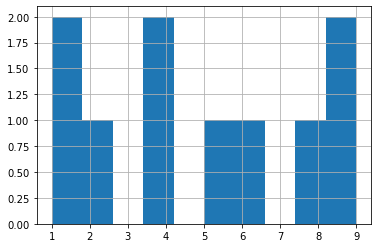

In [126]:
DATASET = 'data/1.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['7'].hist();

In [127]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/1.csv'
204 µs ± 6.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/1.csv
164 µs ± 618 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


	Weight distribution graph of the dataset '2.csv'


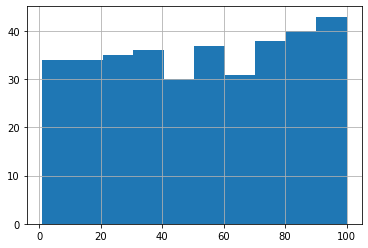

In [128]:
DATASET = 'data/2.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['46'].hist();

In [129]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/2.csv'
3.85 ms ± 83.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/2.csv
1.25 ms ± 7.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


	Weight distribution graph of the dataset '3.csv'


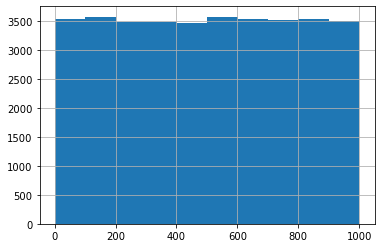

In [130]:
DATASET = 'data/3.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['809'].hist();

In [131]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/3.csv'
5.93 s ± 77.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/3.csv
131 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


	Weight distribution graph of the dataset '4.csv'


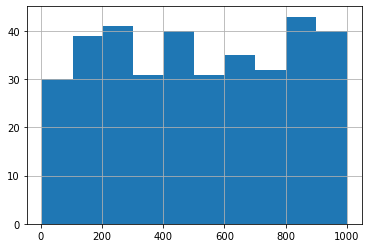

In [132]:
DATASET = 'data/4.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['338'].hist();

In [133]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/4.csv'
3.78 ms ± 71 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/4.csv
1.26 ms ± 9.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


	Weight distribution graph of the dataset '5.csv'


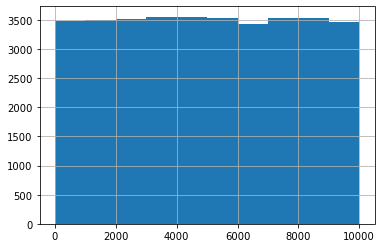

In [134]:
DATASET = 'data/5.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['1058'].hist();

In [135]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/5.csv'
7.3 s ± 1.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/5.csv
133 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


	Weight distribution graph of the dataset '6.csv'


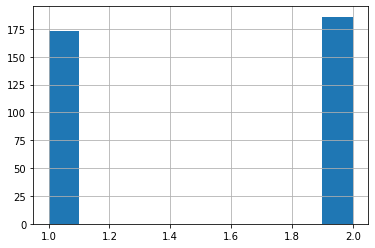

In [136]:
DATASET = 'data/6.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['1.1'].hist();

In [137]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/6.csv'
2.91 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/6.csv
1.3 ms ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


	Weight distribution graph of the dataset '7.csv'


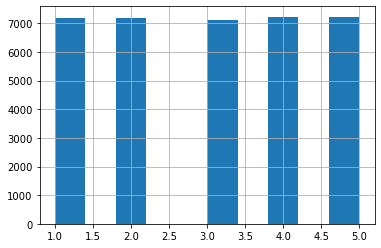

In [138]:
DATASET = 'data/7.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['4'].hist();

In [139]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/7.csv'
2.01 s ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/7.csv
140 ms ± 2.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
def find_vertices_in_tree(tree):
    vertices = set()
    for edge in tree:
        vertices.add(edge[1])
        vertices.add(edge[2])
    return vertices

In [32]:
def count_minimum_spanning_tree_weight(tree):
    count = 0
    for edge in tree:
        count += int(edge[2])
    return count

In [175]:
def load_dataset(filepath):
    vertices = set()
    graph = {
        'edges':set([]),
        'vertices':set([]),
    }
    try:
        f = open(filepath, "r")
        for x in f:
            x = x.replace(' ', '')
            split_line = x.split(',')
            split_line[2] = split_line[2].replace('\n', '')
            graph['edges'].add((int(split_line[2]),split_line[1],split_line[0]))
            graph['vertices'].add(str(split_line[0]))
            graph['vertices'].add(str(split_line[1]))
        f.close()
        return graph
    except:
        return -1

In [19]:
def find_vertices(graph):
    vertices = set()
    for edge in graph['edges']:
        vertices.add(edge[1])
        vertices.add(edge[2])
    return vertices

In [91]:
parent = dict()
rank = dict()

# funkce find pro union & find
def find(vertice):
    if parent[vertice] != vertice:
        parent[vertice] = find(parent[vertice])
    return parent[vertice]
# funkce union pro union & find
def union(vertice1, vertice2):
    root1 = find(vertice1)
    root2 = find(vertice2)
    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root1] = root2
            if rank[root1] == rank[root2]: rank[root2] += 1

# ma alternativni implementace kruskalova algoritmu
def alternative_kruskal(graph):
    #haldy h
    h = []
    for vertice in graph['vertices']:
        make_set(vertice)

    minimum_spanning_tree = set()
    j = 0
    h = []
    buckets = bucket_sort(graph)
    while len(minimum_spanning_tree) < len(graph['vertices']) - 1:
        if(len(h) == 0):
            #buckets = bucket_sort(graph)
            #empty_bucket = find_non_empty_bucket(bucket_sort(graph), j)[1]
            empty_bucket = find_non_empty_bucket(buckets, j)[1]
            #j = find_non_empty_bucket(bucket_sort(graph), j)[0]
            j = find_non_empty_bucket(buckets, j)[0]
            for val in empty_bucket:
                heapq.heappush(h, val)
           
        edge = find_and_remove_edge(graph, min(h))
        
        heapq.heappop(h)
        if len(h) == 0:
            buckets[j] = []
        
        weight, vertice1, vertice2 = edge
        if find(vertice1) != find(vertice2):
            minimum_spanning_tree.add(edge)
            union(vertice1, vertice2)
    
    #print(len(minimum_spanning_tree))
    return minimum_spanning_tree

In [104]:
alternative_kruskal(load_dataset(DATASET))

{(1, '1', '90'),
 (1, '10', '98'),
 (1, '100', '56'),
 (1, '100', '91'),
 (1, '11', '66'),
 (1, '12', '36'),
 (1, '13', '5'),
 (1, '21', '58'),
 (1, '21', '79'),
 (1, '22', '64'),
 (1, '26', '87'),
 (1, '27', '10'),
 (1, '28', '69'),
 (1, '29', '24'),
 (1, '30', '18'),
 (1, '31', '13'),
 (1, '32', '27'),
 (1, '34', '1'),
 (1, '35', '14'),
 (1, '38', '25'),
 (1, '39', '91'),
 (1, '40', '35'),
 (1, '43', '3'),
 (1, '43', '92'),
 (1, '45', '24'),
 (1, '46', '20'),
 (1, '46', '6'),
 (1, '47', '35'),
 (1, '48', '13'),
 (1, '48', '35'),
 (1, '49', '42'),
 (1, '50', '15'),
 (1, '50', '49'),
 (1, '50', '96'),
 (1, '51', '100'),
 (1, '52', '19'),
 (1, '52', '9'),
 (1, '53', '6'),
 (1, '54', '69'),
 (1, '55', '25'),
 (1, '55', '73'),
 (1, '56', '52'),
 (1, '59', '46'),
 (1, '6', '86'),
 (1, '60', '41'),
 (1, '60', '52'),
 (1, '61', '16'),
 (1, '61', '57'),
 (1, '62', '59'),
 (1, '62', '69'),
 (1, '64', '40'),
 (1, '65', '16'),
 (1, '66', '38'),
 (1, '66', '80'),
 (1, '67', '13'),
 (1, '68', '46'

In [32]:
# vyhledani a vymazani hrany s danym ohodnocenim hrany
def find_and_remove_edge(graph, cost):
    for edge in graph['edges']:
        if edge[0] == cost:
            graph['edges'].remove(edge)
            return edge 
    return -1

In [41]:
# bucket sort pro vytvoreni prihradek (intervalu) ohodnoceni hran v grafu
def bucket_sort(graph):
    edges = graph['edges']
    #max ohodnoceni hrany pro vypocet intervalu
    max_value = max(edges)[0]
    #vypocet velikosti prihradek
    bucket_size = max_value / len(edges)

    buckets = []
    for _ in edges:
        buckets.append([])

    for edge in edges:
        if int(edge[0] / bucket_size) == len(buckets):
            buckets[int(edge[0] / bucket_size)-1].append(edge[0])
        else:
            buckets[int(edge[0] / bucket_size)].append(edge[0])
    
    return(buckets)


In [24]:
# vyhledani neprazdne prihradky od indexu @index do konce pole
# v pripade nenalezeni zadneho vraci -1
def find_non_empty_bucket(buckets, index):
    for i in range(index, len(buckets)):
        if len(buckets[i]) != 0:
            return i, buckets[i]
    return -1

In [17]:
parent = dict()
rank = dict()

def make_set(vertice):
    parent[vertice] = vertice
    rank[vertice] = 0

def find(vertice):
    if parent[vertice] != vertice:
        parent[vertice] = find(parent[vertice])
    return parent[vertice]

def union(vertice1, vertice2):
    root1 = find(vertice1)
    root2 = find(vertice2)
    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root1] = root2
            if rank[root1] == rank[root2]: rank[root2] += 1

def og_kruskal(graph):
    for vertice in graph['vertices']:
        make_set(vertice)

    minimum_spanning_tree = set()
    edges = list(graph['edges'])
    edges.sort()
    for edge in edges:        
    
        weight, vertice1, vertice2 = edge
        if find(vertice1) != find(vertice2):
            union(vertice1, vertice2)
            minimum_spanning_tree.add(edge)

    return minimum_spanning_tree

set_graph = {
        'vertices': ['A', 'B', 'C', 'D', 'E', 'F'],
        'edges': set([
            (1, 'A', 'B'),
            (5, 'A', 'C'),
            (3, 'A', 'D'),
            (4, 'B', 'C'),
            (2, 'B', 'D'),
            (1, 'C', 'D'),
            (8, 'C', 'D'),
            (20, 'C', 'D'),
            ])
        }
set_minimum_spanning_tree = set([
            (1, 'A', 'B'),
            (2, 'B', 'D'),
            (1, 'C', 'D'),
            ])
#sorted(graph_copy['edges'])            
assert og_kruskal(set_graph) == set_minimum_spanning_tree
#print(minimum_spanning_tree)
#len(graph['edges'])